In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib import image as mpimg
import sys
from sklearn.metrics import mean_squared_error

import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings('ignore', category=ConvergenceWarning)


# image = mpimg.imread("/Users/swagatpradhan/Desktop/sem1/ML/Assignment2/Assignment2_files/Assignment2_image.jpg")


In [2]:
import os
#custom saving path
custom_path = '/Users/swagatpradhan/Desktop/sem1/ML/Assignment2/Assignment2_files/'
get_ipython().run_line_magic('cd', custom_path)

/Users/swagatpradhan/Desktop/sem1/ML/Assignment2/Assignment2_files


In [3]:
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from PIL import Image

image = Image.open('/Users/swagatpradhan/Desktop/sem1/ML/Assignment2/Assignment2_files/Assignment2_image.jpg')  

# Convert the PIL Image to a NumPy array
image = np.array(image)

imagex, imagey, imagez = image.shape
image_size=imagex*imagey*imagez
def agglomerative_compression(c, k, image):
    windows = []
    for X in range(0, imagex, c):
        for Y in range(0, imagey, c):
            window = image[X:X + c, Y:Y + c, :].copy()
            windowX, windowY, z = window.shape
            if (windowX * windowY < c * c):
                augment_size = (c * c) / (windowX * windowY)
                temp = []
                for i in range(int(augment_size)):
                    temp += window.tolist()
                window = np.array(temp)

            try:
                window = window.reshape(c * c * 3)
                windows.append(window)

            except Exception as e:
                print("Except,", X, Y, window.shape)
                print(e)

    clustering = AgglomerativeClustering(n_clusters=k, linkage='complete').fit(windows)
    clusters = clustering.labels_
    unique, counts = np.unique(clusters, return_counts=True)

    mean = np.array([[0] * len(windows[0]) for i in range(len(counts))])

    for i in range(len(windows)):
        mean[clusters[i]] += windows[i]

    for i in range(len(counts)):
        mean[i] = mean[i] / counts[i]

    for i in range(len(windows)):
        windows[i] = mean[clusters[i]]

    counter = 0
    for X in range(0, imagex, c):
        for Y in range(0, imagey, c):
            ImageX, ImageY, z = image[X:X + c, Y:Y + c, :].shape
            if (ImageX, ImageY < c * c):
                temp = windows[counter]
                temp = temp[:ImageX * ImageY * 3]
                windows[counter] = temp
            window = windows[counter].reshape(ImageX, ImageY, 3)
            image[X:X + c, Y:Y + c, :] = window.copy()
            counter += 1
    mse_accumulator = 0.0
    num_pixels = 0
    
    return image



Reconstruction error: 97.10571541666667


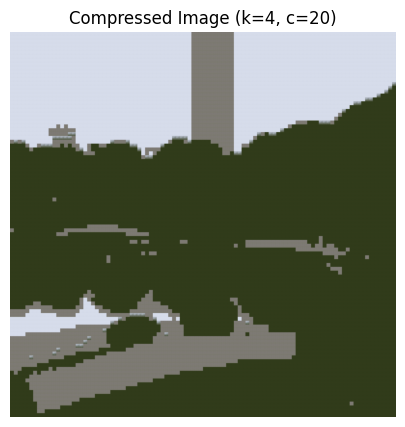

Reconstruction error: 96.54462775


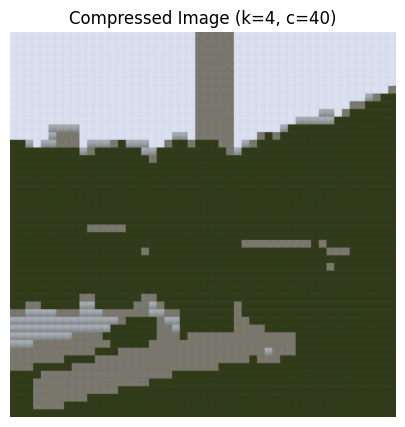

Reconstruction error: 97.48763466666666


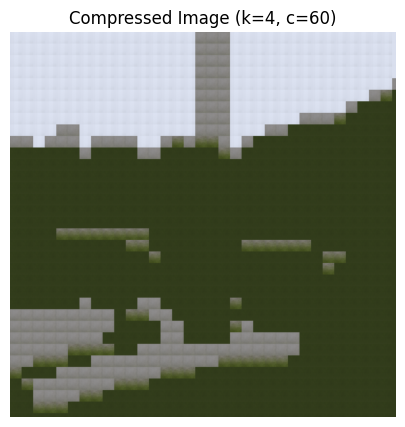

Reconstruction error: 95.32188908333333


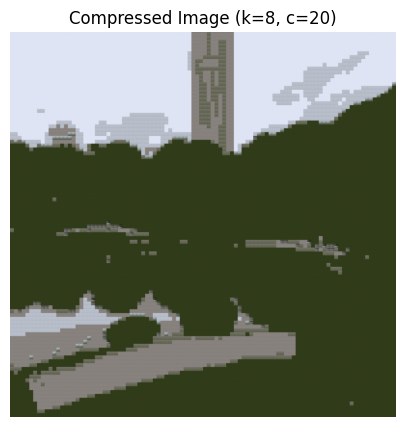

Reconstruction error: 93.54600883333333


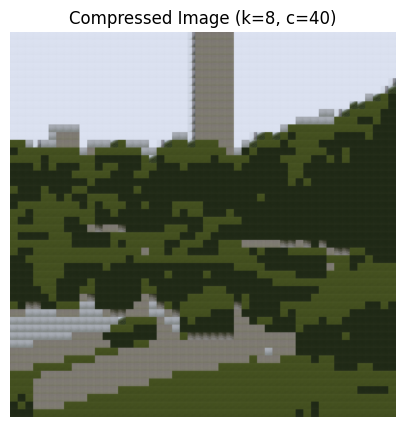

Reconstruction error: 93.425742


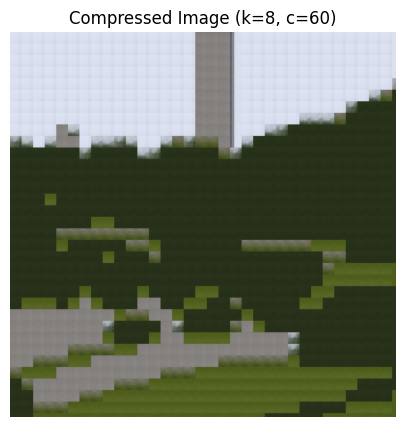

Reconstruction error: 89.661134


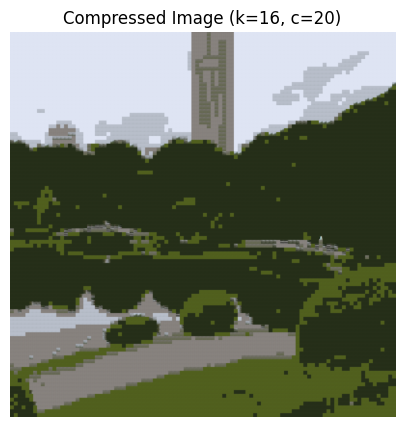

Reconstruction error: 93.18603591666667


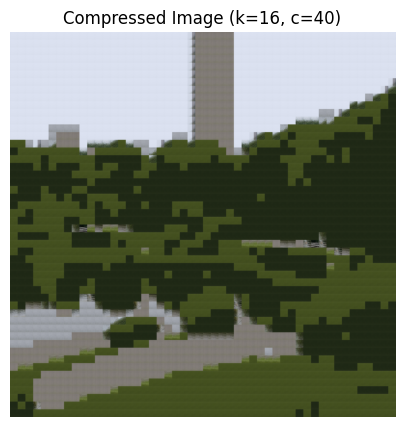

Reconstruction error: 91.8258675


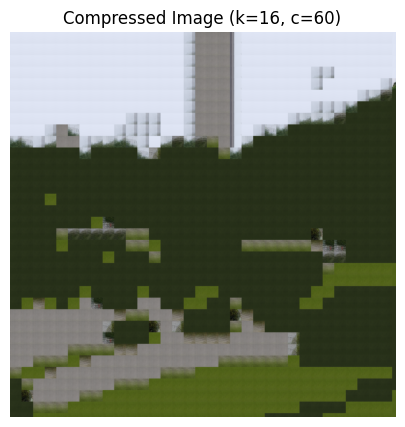

In [4]:
k_values = [4, 8, 16]
c_values = [20, 40, 60]
error = 0
for k in k_values:
    for c in c_values:
        compressed_image = agglomerative_compression(c, k, image.copy())
        error= (np.sum((image-compressed_image)**2))/image_size
        print('Reconstruction error:',error)
        #final_image = Image.fromarray(compressed_image)
        #final_image.save(f"Aggolomerative_compressed_{k}_{c}.jpg")
        
        #display
        import matplotlib.pyplot as plt

        plt.figure(figsize=(10, 5))
        plt.title(f"Compressed Image (k={k}, c={c})")
        plt.imshow(compressed_image)
        plt.axis('off')
        plt.show()

In [5]:
initialsize = os.stat('Assignment2_image.jpg')
print("\n size of image before running Agglomerative Clustering algorithm: ",initialsize.st_size/1024,"KB")
for k in k_values:
    for c in c_values:
        info = os.stat(f"Aggolomerative_compressed_{k}_{c}.jpg")
        print(f"\n size of image after running Agglomerative Clustering algorithm: k={k} c={c}: ",info.st_size/1024,"KB")
        print(f"compression rate k={k} c={c}:", (1-(info.st_size/1024)/(initialsize.st_size/1024))*100)


 size of image before running Agglomerative Clustering algorithm:  808.8515625 KB

 size of image after running Agglomerative Clustering algorithm: k=4 c=20:  111.9521484375 KB
compression rate k=4 c=20: 86.15912317811713

 size of image after running Agglomerative Clustering algorithm: k=4 c=40:  117.9326171875 KB
compression rate k=4 c=40: 85.419745395188

 size of image after running Agglomerative Clustering algorithm: k=4 c=60:  151.16796875 KB
compression rate k=4 c=60: 81.31078979649

 size of image after running Agglomerative Clustering algorithm: k=8 c=20:  126.904296875 KB
compression rate k=8 c=20: 84.31055798634252

 size of image after running Agglomerative Clustering algorithm: k=8 c=40:  132.7626953125 KB
compression rate k=8 c=40: 83.58627200989058

 size of image after running Agglomerative Clustering algorithm: k=8 c=60:  174.0888671875 KB
compression rate k=8 c=60: 78.47703147788627

 size of image after running Agglomerative Clustering algorithm: k=16 c=20:  155.399

# Question 1.4:
Based on above calculations, the best pair of reconstruction error and Compressio nrate is : k=16 c=40 Reconstruction error=89.66 and Compression rate=90.